In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer

from collections import Counter

sns.set_style("darkgrid")

In [54]:
def loadData(directory):
    
    df = pd.read_csv(directory,sep="\t")
    
    return df

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

In [28]:
################################
## Description with quality = 0
################################

X_dev.iloc[14741,1]

'Clean as anyone should reasonably expect given the almost unheard-of price. It offers solid cherry and blackberry flavors, while the mouthfeel is round and totally inoffensive. Drink it now; cook with it; make a sangria with it. Just enjoy it.'

In [30]:
##################################
## Description with quality = 100
##################################

X_dev.iloc[101277,1]

'The nose on this single-vineyard wine from a strong, often overlooked appellation is tight and minerally before showing a slightly tropical kiwi element. Brightly acidic on the lively palate, flavors range from Key lime and Meyer lemon to pear skins and apple flesh.'

In [7]:
################################
## Summary
################################

print(f"Total number of reviews\t\t {len(X_dev) + len(X_eval)}")
print(f"Developement shape\t\t{X_dev.shape}")
print(f"Evaluation shape\t\t{X_eval.shape}")
print(f"Number of dev duplicates\t {X_dev.duplicated().sum()}")

Total number of reviews		 150930
Developement shape		(120744, 9)
Evaluation shape		(30186, 8)
Number of dev duplicates	 35716


In [8]:
## dev null values
X_dev.isnull().sum()

country            5
description        0
designation    36518
province           5
region_1       20008
region_2       72008
variety            0
winery             0
quality            0
dtype: int64

In [9]:
## eval null values
X_eval.isnull().sum()

country            0
description        0
designation     9217
province           0
region_1        5052
region_2       17969
variety            0
winery             0
dtype: int64

In [ ]:
X_dev['country'].sum().

In [12]:
#########################################
## Cardinality of categorical features
#########################################

for index in X_dev.columns:
    
    if index == "quality":
        break
    dev_count = len(Counter(X_dev[index]))
    eval_count = len(Counter(X_eval[index]))
    print(f"Number of unique values for {index} : {len(Counter(X_dev[index]))}")
    
#########################################
## Percentages of null values (dev,eval)
#########################################

print("\n")
for index in X_dev.columns:
    
    if index == "quality":
        break
        
    null_dev = round(X_dev[index].isnull().sum()/X_dev.shape[0],5)*100
    null_eval = round(X_eval[index].isnull().sum()/X_eval.shape[0],5)*100
    print(f"Percentages of null values for {index} : {(null_dev,null_eval)}")

Number of unique values for country : 49
Number of unique values for description : 85005
Number of unique values for designation : 27801
Number of unique values for province : 445
Number of unique values for region_1 : 1207
Number of unique values for region_2 : 19
Number of unique values for variety : 603
Number of unique values for winery : 14105


Percentages of null values for country : (0.004, 0.0)
Percentages of null values for description : (0.0, 0.0)
Percentages of null values for designation : (30.244, 30.534)
Percentages of null values for province : (0.004, 0.0)
Percentages of null values for region_1 : (16.570999999999998, 16.736)
Percentages of null values for region_2 : (59.63699999999999, 59.528000000000006)
Percentages of null values for variety : (0.0, 0.0)
Percentages of null values for winery : (0.0, 0.0)


## Quality 

In [27]:
###################
## 1.5(IQR) Rule
###################

print(f"\nOutliers detection:")
t = X_dev["quality"].quantile(0.75) - X_dev["quality"].quantile(0.25)
min_t = X_dev["quality"].quantile(0.25) - 1.5 * t
max_t = X_dev["quality"].quantile(0.75) + 1.5 * t

print(f"t   = \t{t}")
print(f"min = \t{min_t}")
print(f"max = \t{max_t}")

print(f"\nAverage = {np.mean(X_dev['quality'])}")
print(f"Median  = {(X_dev['quality'].quantile(0.50))}")

X_filtered = X_dev[X_dev["quality"] >= X_dev["quality"].quantile(0.025)]
X_filtered = X_filtered[X_filtered["quality"] <= X_dev["quality"].quantile(0.975)]

print(f"\nOutliers = {X_dev.shape[0] - X_filtered.shape[0]}")


Outliers detection:
t   = 	17.0
min = 	12.5
max = 	80.5

Average = 46.27785231564302
Median  = 46.0

Outliers = 4972


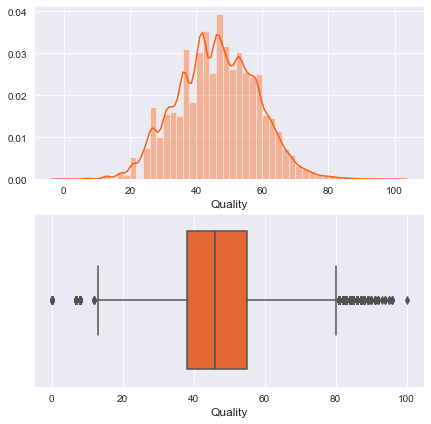

In [13]:
################################
## Distribution and outliers
################################

fig, ax = plt.subplots(2,1,figsize=(7, 7))
sns.distplot(X_dev["quality"],color="#ff5e13", ax=ax[0])
sns.boxplot(X_dev['quality'], color="#ff5e13",ax=ax[1])
ax[0].set_xlabel("Quality", fontsize=12)
ax[1].set_xlabel("Quality", fontsize=12)

plt.savefig("quality_image.svg", format="svg" )

## Country

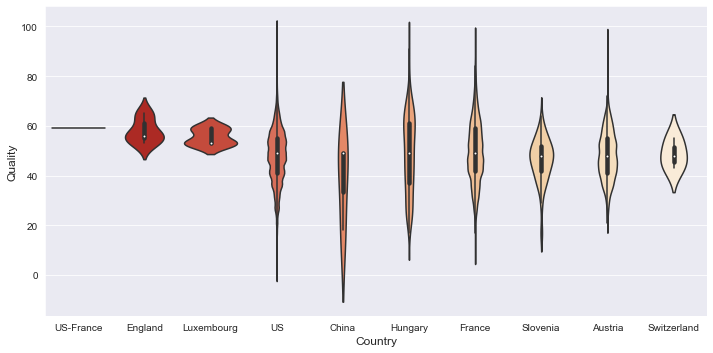

In [16]:
top_countries  = X_dev.groupby('country').quality.median().sort_values(ascending=False).index[:10]
top_countries_df = X_dev[X_dev["country"].isin(top_countries)]

fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(ax=ax,x="country", y="quality", order=top_countries, data=top_countries_df,palette="OrRd_r")
plt.tight_layout()
plt.xlabel("Country", fontsize=12)
plt.ylabel("Quality", fontsize=12)

plt.savefig("country.svg", format="svg" )

## Province

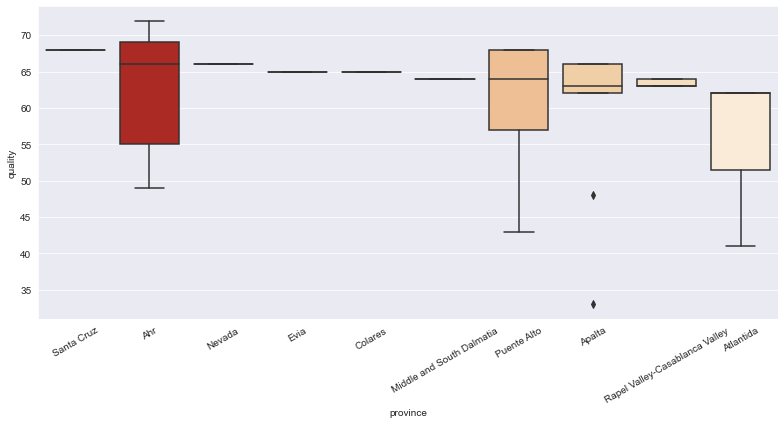

In [99]:
top  = X_dev.groupby('province').quality.median().sort_values(ascending=False).index[:10]
top_df = X_dev[X_dev['province'].isin(top)]

fig, ax = plt.subplots(figsize=(11, 6))
sns.boxplot(ax=ax,x="province", y="quality", order=top, data=top_df,palette="OrRd_r")
ax.set_xticklabels(rotation=30,labels=top)
plt.tight_layout()

## Region_1

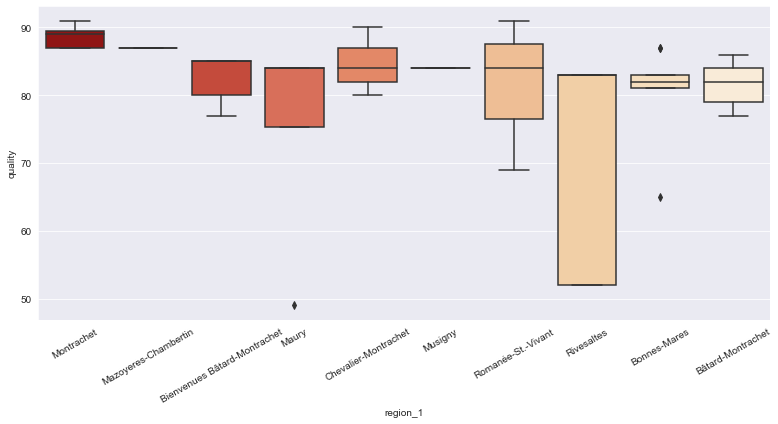

In [101]:
top  = X_dev.groupby('region_1').quality.median().sort_values(ascending=False).index[:10]
top_df = X_dev[X_dev['region_1'].isin(top)]

fig, ax = plt.subplots(figsize=(11, 6))
sns.boxplot(ax=ax,x="region_1", y="quality", order=top, data=top_df,palette="OrRd_r")
ax.set_xticklabels(rotation=30,labels=top)
plt.tight_layout()

## Region_2

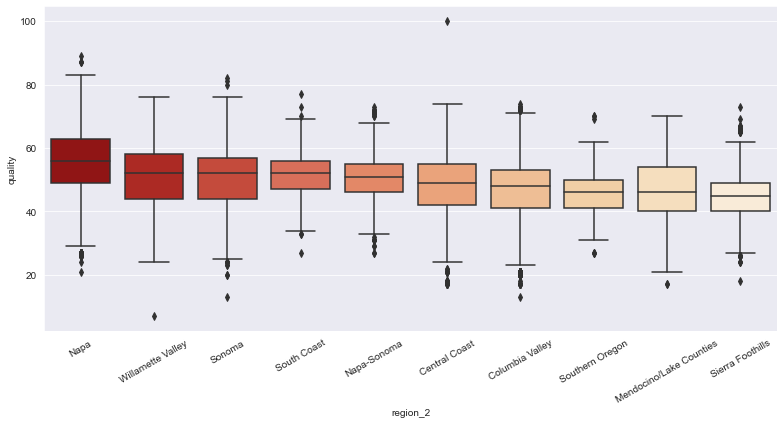

In [102]:
top  = X_dev.groupby('region_2').quality.median().sort_values(ascending=False).index[:10]
top_df = X_dev[X_dev['region_2'].isin(top)]

fig, ax = plt.subplots(figsize=(11, 6))
sns.boxplot(ax=ax,x="region_2", y="quality", order=top, data=top_df,palette="OrRd_r")
ax.set_xticklabels(rotation=30,labels=top)
plt.tight_layout()

## Designation

<AxesSubplot:xlabel='quality', ylabel='designation'>

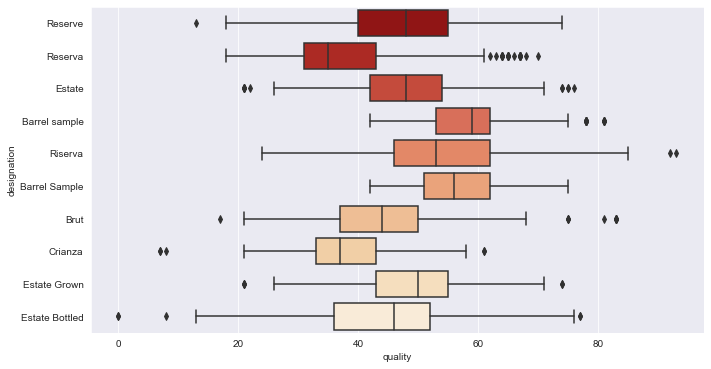

In [24]:
fig, ax = plt.subplots(figsize=(11, 6))

top_frequents = X_dev["designation"].value_counts()[:10].index
top_frequents_df = X_dev[X_dev['designation'].isin(top_frequents)]

sns.boxplot(ax=ax, data=top_frequents_df, x='quality', y='designation', order=top_frequents,palette="OrRd_r")

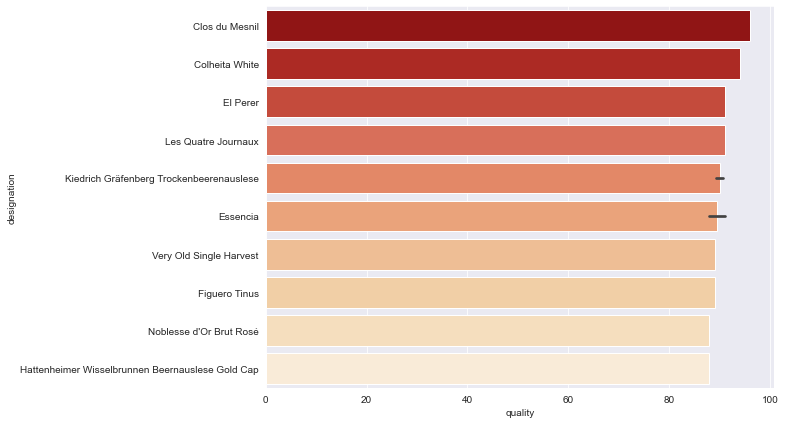

In [4]:
top  = X_dev.groupby('designation').quality.median().sort_values(ascending=False).index[:10]
top_df = X_dev[X_dev['designation'].isin(top)]

fig, ax = plt.subplots(figsize=(11, 6))
sns.barplot(ax=ax,x="quality", y="designation", order=top, data=top_df,palette="OrRd_r")

plt.tight_layout()

## Winery

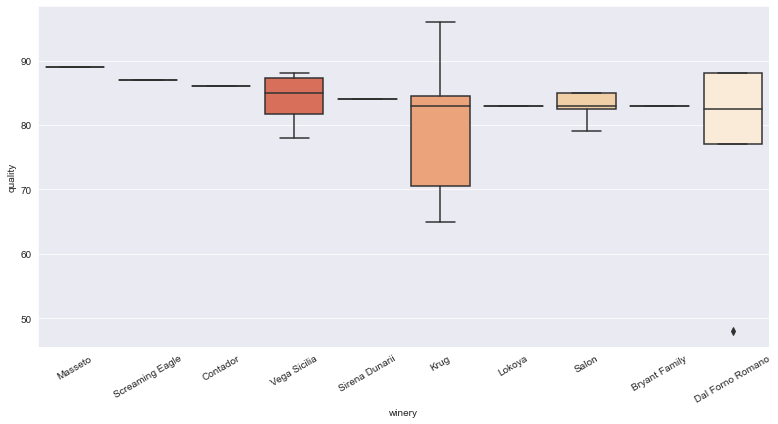

In [119]:
top  = X_dev.groupby('winery').quality.median().sort_values(ascending=False).index[:10]
top_df = X_dev[X_dev['winery'].isin(top)]

fig, ax = plt.subplots(figsize=(11, 6))
sns.boxplot(ax=ax,x="winery", y="quality", order=top, data=top_df,palette="OrRd_r")
ax.set_xticklabels(rotation=30,labels=top)
plt.tight_layout()

## Description

In [31]:
print(f"values: \t{X_dev['description'].shape}")
print(f"unique values:\t {len(X_dev['description'].value_counts())}")

values: 	(120744,)
unique values:	 85005


Average length: 240.51
Minimum length: 17
Maximum length: 764


<AxesSubplot:xlabel='description_length'>

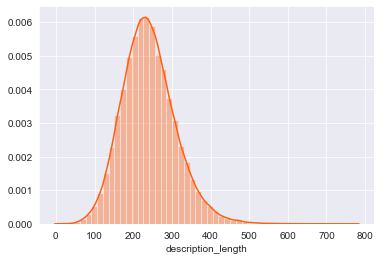

In [32]:
X_temp = X_dev[['description','quality']].copy()
X_temp['description_length'] = X_temp['description'].apply(lambda x : len(x))

print(f"Average length: {np.round(np.mean(X_temp['description_length']),2)}")
print(f"Minimum length: {np.min(X_temp['description_length'])}")
print(f"Maximum length: {np.max(X_temp['description_length'])}")

sns.distplot(X_temp['description_length'], color="#ff5e13")

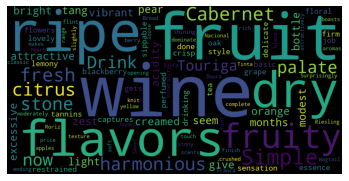

In [36]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import random

wc = WordCloud(width=1200, height=600,max_words=100, stopwords = STOPWORDS,
               min_word_length=3, min_font_size=3).generate(''.join(str(X_temp['description'].values)))

plt.imshow(wc.recolor(random_state=3))
plt.axis('off')
plt.savefig("fig2.svg", format="svg")